<a href="https://colab.research.google.com/github/alfiyyahnz/case-study-3-kelompok-6/blob/main/Case_Study_3_Kelompok_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Market Basket Analysis Toko AlfaIndo Cabang UIN Ciputat

**Market Basket Analysis Toko AlfaIndo Cabang UIN Ciputat**

AlfaIndo adalah sebuah toko waralaba yang memiliki beberapa cabang di kota-kota besar di Indonesia seperti Jakarta, Depok, Tangerang, Surabaya, dan Medan. Pasca masa pandemi Toko AlfaIndo cabang UIN Ciputat mengalami penurunan laba yang signifikan. Oleh karena itu, kami akan memberikan saran dan strategi untuk ALfaIndo cabang UIN Ciputat untuk dapat meningkatkan poenjualan dan bangkit dari keterpurukannya.

In [ ]:
# import modul yang akan digunakan

try:
    import google.colab as gc_
    print("Running the code in Google Colab.", gc_) #IN_COLAB = True
    print("Installing required Module, please wait ... ")
    !pip install mlxtend 
    !pip install pycaret
except:
    print("Running the code locally, make sure to install required modules.")#IN_COLAB = False

Running the code in Google Colab. <module 'google.colab' from '/usr/local/lib/python3.7/dist-packages/google/colab/__init__.py'>
Installing required Module, please wait ... 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from itertools import combinations
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from pycaret.arules import *
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('bmh'); sns.set()

In [ ]:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/alfiyyahnz/case-study-3-kelompok-6/main/Data%20Produk.csv
df_p = pd.read_csv("data/Data Produk.csv", low_memory = False, encoding='utf8')
df_p.shape
!wget -P data/ https://raw.githubusercontent.com/alfiyyahnz/case-study-3-kelompok-6/main/Data%20Transaksi.csv
df_t = pd.read_csv("data/Data Transaksi.csv", low_memory = False, encoding='utf8')
df_t.shape

mkdir: cannot create directory ‘data’: File exists
--2022-10-26 05:13:45--  https://raw.githubusercontent.com/alfiyyahnz/case-study-3-kelompok-6/main/Data%20Produk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 246 [text/plain]
Saving to: ‘data/Data Produk.csv.4’

Data Produk.csv.4   100%[===================>]     246  --.-KB/s    in 0s      

2022-10-26 05:13:45 (8.67 MB/s) - ‘data/Data Produk.csv.4’ saved [246/246]

--2022-10-26 05:13:45--  https://raw.githubusercontent.com/alfiyyahnz/case-study-3-kelompok-6/main/Data%20Transaksi.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connect

(56, 7)

#Data Preprocessing

**Cek Missing Value**

In [ ]:
# Melihat data produk
df_p

,ID Produk,Nama Produk,Merek
0,1,Roti,Sri Roti
1,2,Air Minum,Aquos
2,3,Roti,Prambanan
3,4,Sabun,Lifboy
4,5,Shampoo,Clean
5,6,Snack,Chiki
6,7,Sabun,Luks
7,8,Snack,Citata
8,9,Rokok,Malioboro
9,10,Air Minum,Sprit


In [ ]:
df_p.isnull().sum()

ID Produk      0
Nama Produk    0
Merek          0
dtype: int64

Dari output diatas terlihat bahwa tidak terdapat missing value pada data produk

In [ ]:
# Melihat data transaksi
df_t

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1.0,7/1/2022 0:00,Mr. A,1,Roti,Sri Roti,2
1,NaN,NaN,NaN,2,Air Minum,Aquos,1
2,NaN,NaN,NaN,11,Mie Instan,Indomi,2
3,NaN,NaN,NaN,12,Mie Instan,Mi Sedap,1
4,2.0,7/1/2022 0:00,Mr. B,2,Air Minum,Aquos,1
5,NaN,NaN,NaN,6,Snack,Chiki,2
6,NaN,NaN,NaN,3,Roti,Prambanan,1
7,NaN,NaN,NaN,5,Shampoo,Clean,1
8,3.0,7/2/2022 0:00,Mr. C,4,Sabun,Lifboy,1
9,NaN,NaN,NaN,5,Shampoo,Clean,1


In [ ]:
df_t.isnull().sum()

ID Transaksi    38
Tanggal         38
Konsumen        38
ID Produk        0
Nama Produk      0
Merek            0
Jumlah           0
dtype: int64

Dari output diatas terlihat bahwa terdapat beberapa missing value. Sehingga kita perlu mengatasi missing value tersebut dengan cara mengisi nilai NaN mengikuti data sebelumnya.

In [ ]:
df_t.fillna(method = 'ffill', inplace = True)

In [ ]:
df_t.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1.0,7/1/2022 0:00,Mr. A,1,Roti,Sri Roti,2
1,1.0,7/1/2022 0:00,Mr. A,2,Air Minum,Aquos,1
2,1.0,7/1/2022 0:00,Mr. A,11,Mie Instan,Indomi,2
3,1.0,7/1/2022 0:00,Mr. A,12,Mie Instan,Mi Sedap,1
4,2.0,7/1/2022 0:00,Mr. B,2,Air Minum,Aquos,1


Pada proses diatas kita telah mengatasi missing value. Sehingga kita dapat melakukan proses selanjutnya.

**Cek tipe data**

In [ ]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID Transaksi  56 non-null     float64
 1   Tanggal       56 non-null     object 
 2   Konsumen      56 non-null     object 
 3   ID Produk     56 non-null     int64  
 4   Nama Produk   56 non-null     object 
 5   Merek         56 non-null     object 
 6   Jumlah        56 non-null     int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 3.2+ KB


In [ ]:
df_t['ID Transaksi'] = df_t['ID Transaksi'].astype('int64')
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID Transaksi  56 non-null     int64 
 1   Tanggal       56 non-null     object
 2   Konsumen      56 non-null     object
 3   ID Produk     56 non-null     int64 
 4   Nama Produk   56 non-null     object
 5   Merek         56 non-null     object
 6   Jumlah        56 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 3.2+ KB


Dapat kita ketahui dari output diatas pada tipe data transaksi kita mengubah kolom pada 'ID Transaksi' dari tipe data float menjadi integer.

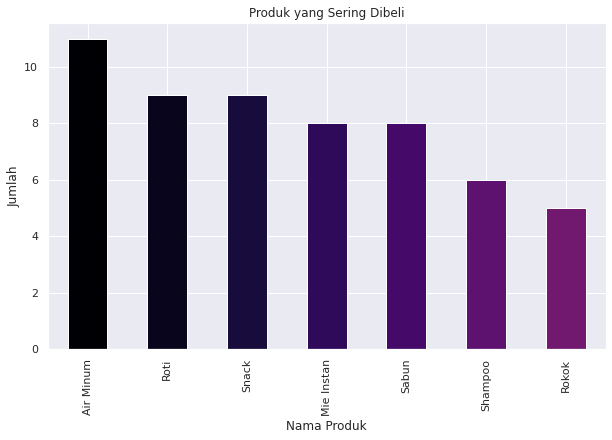

In [ ]:
# Frekuensi produk yang sering dibeli

plt.rcParams['figure.figsize'] = (10,6)
color = plt.cm.inferno(np.linspace(0,1,20))
df_t['Nama Produk'].value_counts().head(20).plot.bar(color = color)
plt.title('Produk yang Sering Dibeli')
plt.ylabel('Jumlah')
plt.xlabel('Nama Produk')
plt.show()

Dapat kita lihat bahwa di Toko AlfaIndo Cabang UIN Ciputat produk yang paling sering dibeli oleh pelanggan adalah Air Minum. Sedangkan, produk yang paling sedikit dibeli adalah Rokok. 

Dengan demikan, kami akan menganalisis dan memberikan saran untuk meningkatkan jumlah pembelian produk-produk di Toko AlfaIndo Cabang UIN Ciputat. 

Dari visualisasi yang tergambarkan tersebut dapat kita duga juga bahwa produk-produk yang sering dibeli akan cocok jika dipasangkan secara beruntun sehingga pembeli tidak perlu terlalu jauh untuk mencari barang tersebut apalagi jika kita adakan promosi bundling untuk hal barang-barang yang paling sering dibeli dan dicari.

# Market Basket Analysis

In [ ]:
# Group the transaction
basket = df_t.groupby(['ID Transaksi', 'Nama Produk'])['Jumlah']
basket.head()

0     2
1     1
2     2
3     1
4     1
5     2
6     1
7     1
8     1
9     1
10    1
11    2
12    2
13    3
14    1
15    2
16    1
17    2
18    2
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    3
27    2
28    1
29    1
30    2
31    1
32    2
33    1
34    2
35    2
36    2
37    1
38    2
39    1
40    2
41    1
42    1
43    2
44    1
45    2
46    2
47    1
48    1
49    2
50    2
51    1
52    1
53    2
54    2
55    2
Name: Jumlah, dtype: int64

In [ ]:
# Jumlahkan, unstack, Null=0, index baris menggunakan Nomer Invoice
basket = basket.sum().unstack().reset_index().fillna(0).set_index('ID Transaksi')
basket.head()

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1,1.0,3.0,0.0,2.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,2.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,2.0,2.0,0.0,2.0,1.0,0.0,3.0
5,2.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units) # one-hot encoding
basket_sets.head()

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1,1,1,0,1,0,0,0
2,1,0,0,1,0,1,1
3,0,0,1,0,1,1,0
4,1,1,0,1,1,0,1
5,1,0,0,0,0,0,1


# Understanding the Data Structure

In [ ]:
basket_sets.columns

Index(['Air Minum', 'Mie Instan', 'Rokok', 'Roti', 'Sabun', 'Shampoo',
       'Snack'],
      dtype='object', name='Nama Produk')

In [ ]:
basket_sets.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype='int64', name='ID Transaksi')

In [ ]:
basket_sets.iloc[0]

Nama Produk
Air Minum     1
Mie Instan    1
Rokok         0
Roti          1
Sabun         0
Shampoo       0
Snack         0
Name: 1, dtype: int64

In [ ]:
basket_sets.iloc[0].sum()

3

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.1, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets

,support,itemsets
0,0.611111,(Air Minum)
3,0.500000,(Roti)
6,0.500000,(Snack)
4,0.444444,(Sabun)
9,0.444444,"(Roti, Air Minum)"
11,0.388889,"(Snack, Air Minum)"
27,0.333333,"(Roti, Snack, Air Minum)"
5,0.333333,(Shampoo)
1,0.333333,(Mie Instan)
19,0.333333,"(Roti, Snack)"


Kita dapat melihat bahwa air mineral dan roti dominan dibeli secara bersamaan. Sehingga kita bisa meletakkan air mineral dan roti ditempat yang berdampingan atau di rak yang sama.





In [ ]:
type(frequent_itemsets)

pandas.core.frame.DataFrame

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
152,"(Mie Instan, Snack, Air Minum)","(Roti, Sabun)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
169,"(Roti, Sabun)","(Mie Instan, Snack, Air Minum)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
156,"(Roti, Mie Instan, Snack)","(Sabun, Air Minum)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
165,"(Sabun, Air Minum)","(Roti, Mie Instan, Snack)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
80,"(Roti, Sabun)","(Mie Instan, Snack)",0.166667,0.166667,0.111111,0.666667,4.0,0.083333,2.500000


Dari association rule dengan metric 'lift' di atas dapat di lihat bahwa pada baris pertama, karena liftnya besar maka ketika konsumen membeli roti, mie instan, dan snack kemungkinan konsumen juga akan membeli air minum dan sabun. Sehingga disarankan kepada toko Alfaindo untuk menaruh barang roti, mie instan, dan snack ditaruh berjauhan dengan barang air minum dan sabun. Dengan demikian, konsumen dapat tergoda dengan barang lain.

In [ ]:
rules = association_rules(frequent_itemsets, metric ="confidence", min_threshold = 1)
rules = rules.sort_values(by='confidence', ascending =False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Roti, Snack)",(Air Minum),0.333333,0.611111,0.333333,1.0,1.636364,0.129630,inf
1,"(Roti, Mie Instan)",(Air Minum),0.166667,0.611111,0.166667,1.0,1.636364,0.064815,inf
28,"(Sabun, Mie Instan, Roti)","(Snack, Air Minum)",0.111111,0.388889,0.111111,1.0,2.571429,0.067901,inf
27,"(Mie Instan, Snack, Air Minum)","(Roti, Sabun)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
26,"(Sabun, Mie Instan, Air Minum)","(Roti, Snack)",0.111111,0.333333,0.111111,1.0,3.000000,0.074074,inf
25,"(Sabun, Mie Instan, Snack, Roti)",(Air Minum),0.111111,0.611111,0.111111,1.0,1.636364,0.043210,inf
24,"(Roti, Mie Instan, Snack, Air Minum)",(Sabun),0.111111,0.444444,0.111111,1.0,2.250000,0.061728,inf
23,"(Sabun, Mie Instan, Roti, Air Minum)",(Snack),0.111111,0.500000,0.111111,1.0,2.000000,0.055556,inf
22,"(Sabun, Mie Instan, Snack, Air Minum)",(Roti),0.111111,0.500000,0.111111,1.0,2.000000,0.055556,inf
21,"(Sabun, Mie Instan, Air Minum)",(Roti),0.111111,0.500000,0.111111,1.0,2.000000,0.055556,inf


Dari association rule dengan metric 'confidence' di atas dapat di lihat pada baris pertama, jika konsumen membeli roti dan snack maka sudah pasti konsumen membeli air minum.

In [ ]:
#Filtering
rules[ (rules['lift'] >= 6) & (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,"(Mie Instan, Snack, Air Minum)","(Roti, Sabun)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
29,"(Roti, Mie Instan, Snack)","(Sabun, Air Minum)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf


Jika konsumen membeli roti,snack, dan mie instans maka sudah pasti konsumen membeli air minum dan sabun. Karena nilai lift nya besar dan confidencenya 1 maka set item (roti, mie instan, snack) dengan set item (air minum, sabun) jangan dipromosikan secara bersamaan.

# Kesimpulan dan Rekomendasi

Kesimpulan :
* Produk yang paling laku adalah air minum dan produk yang kurang laku adalah rokok
* Berdasarkan rules dengan metric lift, ketika konsumen membeli roti, mie instan, dan Snack maka terdapat kemungkinan konsumen membeli air minum dan sabun. 
* Berdasarkan rules dengan metric confidence, jika konsumen membeli roti dan snack maka konsumen akan membeli air minum.


Rekomendasi Strategi Penjualan :

1. Strategi Penempatan Barang. 
 * Kita bisa meletakkan roti, mie instan dan snack di tempat yang lebih dekat
 * Sabun dan shampoo bisa kita letakkan dalam rak yang sama atau di tempat lain yang lebih dekat.
 * Rokok dan air minum bisa diletakan secaea berdampingan
 * Untuk air minum dan roti disarankan untuk tidak diletakkan secara berdekatan.

2. Strategi Produk Bundling. Kita bisa menempatkan barang yang paling banyak dibeli sebagai satu paket produk dengan produk yang jarang dibeli dengan harga yang lebih murah daripada membeli satuan. Seperti : 
  * Air minum dengan rokok
  * Mie instan dengan snack
  * Sabun dan shampoo 
  * Snack dengan rokok

Cara ini akan menarik lebih banyak penjualan dan menghasilkan lebih banyak pendapatan.

3. Strategi Rekomendasi Pelanggan dan Diskon.
 * Air minum dan rokok dapat kita letakkan di kasir, sehingga setiap kali 
pelanggan membeli air minum ataupun rokok, kita dapat menawarkan dan merekomendasikan mereka untuk membeli paket air minum dan rokok dengan harga yang lebih murah.
 * Untuk sabun dan shampoo, bisa kita promosikan dengan buy 1 get 1 atau beli sabun dengan menambahkan Rp.2000 sudah mendapatkan shampoo. 
 * Kita juga bisa memberikan promo "Beli mie instan 5 akan gratis snack"